# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm
import json
import logging
import csv


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

#REMEMBER to change sample_cities back to cities when running for official hw
url = "http://api.openweathermap.org/data/2.5/weather?"
sample_cities = ["Paris", "Raleigh", "New York", "Seattle"]
print(f"Beginning Data Retrieval")
print(f"----------------------------")
count1 = []
data = []
temperatures = []
cloudiness = []
country = []
humidity = []
lat = []
lon = []
max_temp = []
wind = []
date = []
cities2 = []
for x in cities:
    if x not in count1:
        count1.append(x)
        count2 = str((len(count1)))
        name = x
    try:
        print(f"Processing record " + count2 + "  of Set 1 |" + name)
        query_url = url + "appid=" + api_key + "&q=" + name
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        data.append(weather_json)
        temperatures.append(weather_json["main"]["temp"])  
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        humidity.append(weather_json["main"]["humidity"])
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind.append(weather_json["wind"]["speed"])
        date.append(weather_json["dt"])
        cities2.append(weather_json["name"])
    except KeyError:
        print("City not found, skipping....")
print(f"----------------------------")
print(f"Data Retrieval Complete")
print(f"----------------------------")
    

Beginning Data Retrieval
----------------------------
Processing record 1  of Set 1 |northam
Processing record 2  of Set 1 |new norfolk
Processing record 3  of Set 1 |barcelona
Processing record 4  of Set 1 |vaini
Processing record 5  of Set 1 |cabo san lucas
Processing record 6  of Set 1 |strezhevoy
Processing record 7  of Set 1 |saint-philippe
Processing record 8  of Set 1 |hermanus
Processing record 9  of Set 1 |majene
Processing record 10  of Set 1 |yanchukan
City not found, skipping....
Processing record 11  of Set 1 |illoqqortoormiut
City not found, skipping....
Processing record 12  of Set 1 |moron
Processing record 13  of Set 1 |back mountain
Processing record 14  of Set 1 |luanda
Processing record 15  of Set 1 |rio grande
Processing record 16  of Set 1 |hilo
Processing record 17  of Set 1 |portland
Processing record 18  of Set 1 |cape town
Processing record 19  of Set 1 |faanui
Processing record 20  of Set 1 |punta arenas
Processing record 21  of Set 1 |tumannyy
City not found

Processing record 186  of Set 1 |troitsko-pechorsk
Processing record 187  of Set 1 |biharamulo
Processing record 188  of Set 1 |vigrestad
Processing record 189  of Set 1 |kavieng
Processing record 190  of Set 1 |garowe
Processing record 191  of Set 1 |itoman
Processing record 192  of Set 1 |lorengau
Processing record 193  of Set 1 |tallahassee
Processing record 194  of Set 1 |kerman
Processing record 195  of Set 1 |madang
Processing record 196  of Set 1 |hofn
Processing record 197  of Set 1 |humaita
Processing record 198  of Set 1 |barrow
Processing record 199  of Set 1 |takatsuki
Processing record 200  of Set 1 |sinnamary
Processing record 201  of Set 1 |ahipara
Processing record 202  of Set 1 |tera
Processing record 203  of Set 1 |butaritari
Processing record 204  of Set 1 |vidim
Processing record 205  of Set 1 |tuatapere
Processing record 206  of Set 1 |cayenne
Processing record 207  of Set 1 |coquimbo
Processing record 208  of Set 1 |bandarbeyla
Processing record 209  of Set 1 |tes

Processing record 367  of Set 1 |brokopondo
Processing record 368  of Set 1 |payo
Processing record 369  of Set 1 |itarantim
Processing record 370  of Set 1 |muskegon
Processing record 371  of Set 1 |catamarca
City not found, skipping....
Processing record 372  of Set 1 |zhangye
Processing record 373  of Set 1 |aden
Processing record 374  of Set 1 |carbonia
Processing record 375  of Set 1 |lagoa
Processing record 376  of Set 1 |leningradskiy
Processing record 377  of Set 1 |amuntai
Processing record 378  of Set 1 |srednekolymsk
Processing record 379  of Set 1 |foix
Processing record 380  of Set 1 |porto san giorgio
Processing record 381  of Set 1 |cabedelo
Processing record 382  of Set 1 |dwarka
Processing record 383  of Set 1 |russell
Processing record 384  of Set 1 |pattaya
Processing record 385  of Set 1 |pingdingshan
Processing record 386  of Set 1 |waipawa
Processing record 387  of Set 1 |bolsheustikinskoye
City not found, skipping....
Processing record 388  of Set 1 |loiza
Proces

Processing record 548  of Set 1 |santa lucia
Processing record 549  of Set 1 |santa maria
Processing record 550  of Set 1 |sault sainte marie
Processing record 551  of Set 1 |ketchikan
Processing record 552  of Set 1 |beipiao
Processing record 553  of Set 1 |salta
Processing record 554  of Set 1 |alice springs
Processing record 555  of Set 1 |puri
Processing record 556  of Set 1 |fochville
Processing record 557  of Set 1 |cherkasskoye
Processing record 558  of Set 1 |mamakan
Processing record 559  of Set 1 |hohhot
Processing record 560  of Set 1 |krasnorechenskiy
Processing record 561  of Set 1 |bonnyville
Processing record 562  of Set 1 |alamosa
Processing record 563  of Set 1 |vao
Processing record 564  of Set 1 |dinsor
City not found, skipping....
Processing record 565  of Set 1 |barawe
City not found, skipping....
Processing record 566  of Set 1 |general delgado
Processing record 567  of Set 1 |kuytun
Processing record 568  of Set 1 |igunga
Processing record 569  of Set 1 |guerrero

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#read in raw data to json format, create csv file

raw_data = json.dumps(data, indent=4, sort_keys=False)
raw_data1 = pd.read_json(raw_data, typ='series')
weather_csv = open("weather.csv", "w")
csvwriter = csv.writer(weather_csv)



In [5]:
#create json file an write rawdata to it, export as.json
data = open('weather.json', 'w')
data.write(raw_data)
data.close()

In [6]:
#put info in dataframe object, export to csv
data1 = pd.read_json("weather.json")
data1.to_csv("weather.csv")


In [7]:
data2 = {
    "City":cities2,
    "Country": country,
    "Temperature": temperatures,
    "Clouds": cloudiness,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": max_temp,
    "Wind Speed": wind,
    "Date": date,
}

data3 = pd.DataFrame(data2)
data3.head()


,City,Country,Temperature,Clouds,Humidity,Latitude,Longitude,Max Temp,Wind Speed,Date
0,Northam,GB,283.150,75,93,51.04,-4.21,283.150,6.20,1547396400
1,New Norfolk,AU,288.150,0,82,-42.78,147.06,288.150,3.60,1547395200
2,Barcelona,ES,286.140,0,50,41.38,2.18,287.150,4.60,1547395200
3,Vaini,IN,290.551,0,77,15.34,74.49,290.551,1.51,1547397760
4,Cabo San Lucas,MX,293.050,5,53,22.89,-109.91,295.150,2.21,1547394420


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

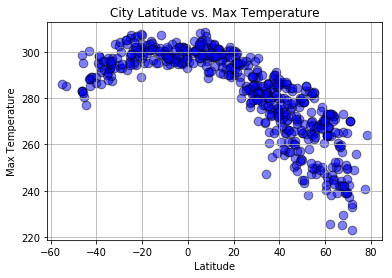

In [8]:
plt.scatter(data3["Latitude"], data3["Max Temp"], marker="o", facecolors="blue", edgecolors="black", s=75, alpha=.5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Max Temperature")
plt.savefig("lat_v_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

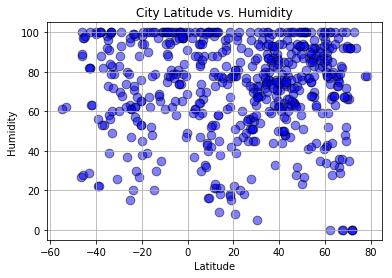

In [9]:
plt.scatter(data3["Latitude"], data3["Humidity"], marker="o", facecolors="blue", edgecolors="black", s=75, alpha=.5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.savefig("lat_v_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

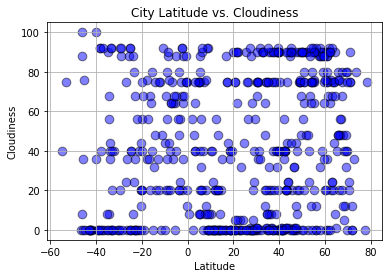

In [10]:
plt.scatter(data3["Latitude"], data3["Clouds"], marker="o", facecolors="blue", edgecolors="black", s=75, alpha=.5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.savefig("lat_v_clouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

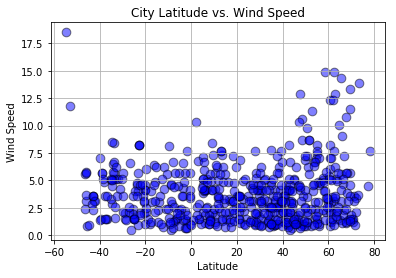

In [11]:
plt.scatter(data3["Latitude"], data3["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", s=75, alpha = .5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.savefig("lat_v_wind.png")
plt.show()

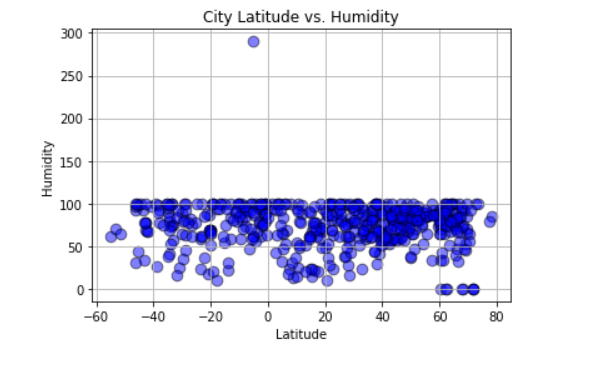

In [12]:
#NOTED:  See plot and subsequent DF
#There was one crazy outlier in my humidity plot. 
#When I re-ran the random cities, it dissapeared, but I saved the info
#Here it is below, I thought it was interesting:
#used .loc to get the details on it
#Paita humidity levels were almost 300%...
#I think this shows some incorrect data on the weather API
#I converted the orientation so you can easily see the following:
#290 is showing as temp, humidity, and max temp.
#humid = data3.loc[data3["Humidity"] > 200]
#humid1 = humid.T
#humid1
from IPython.display import Image
Image(filename="Paita_Outlier.png") 

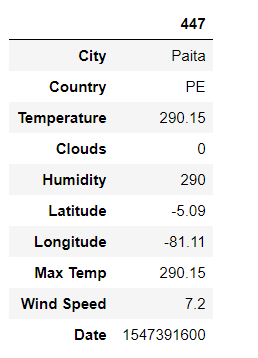

In [13]:
Image(filename="PaitaDF.png")